# Introduction

In [ ]:
"""
What? K-means from scratch

Reference: VanderPlas, Jake. Python data science handbook: Essential tools for working with data.
           "O'Reilly Media, Inc.", 2016.
GLM
"""

# Intro on k-means

In [ ]:
"""
k-means involves an intuitive iterative approach known as expectation–maximization. 

In short, the expectation–maximization approach consists of the following procedure: 
Guess some cluster centers 	
Repeat until converged 	
a. E-Step: assign points to the nearest cluster center 
b. M-Step: set the cluster centers to the mean 

Here the “E-step” or “Expectation step” is so named because it involves updating our expectation of which cluster 
each point belongs to. The “M-step” or “Maximization step” is so named because it involves maximizing some fitness 
function that defines the location of the cluster centers—in this case, that maximization is accomplished by taking 
a simple mean of the data in each cluster.
"""

# Import libraries/modules

In [7]:
from sklearn.metrics import pairwise_distances_argmin
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set() 
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.datasets import make_moons
from sklearn.cluster import SpectralClustering
from matplotlib import rcParams

rcParams['figure.figsize'] = 7, 7
rcParams['font.size'] = 20

# Create dataset

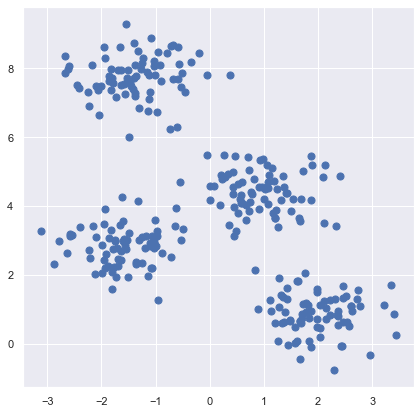

In [8]:
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50)

# Implementing k-cluster

In [10]:
def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)
        
        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0) for i in range(n_clusters)])
        
        # 2c. Check for convergence
        if np.all(centers == new_centers): 
            break
        centers = new_centers 
    return centers, labels

# Testing

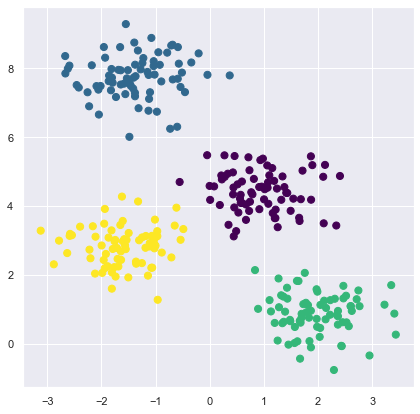

In [11]:
centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');

# Issue - initialisation

In [ ]:
"""
First, although the E–M procedure is guaranteed to improve the result in each step, there is no assurance that 
it will lead to the global best solution. For example, if we use a different random seed in our simple procedure,
the particular starting guesses lead to poor results.
"""

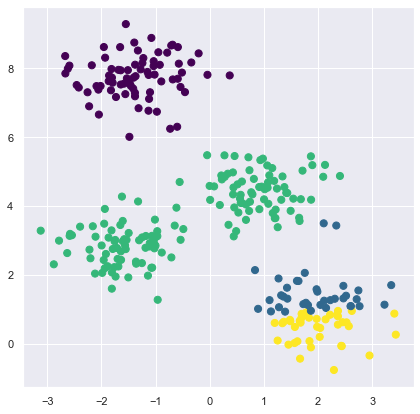

In [12]:
centers, labels = find_clusters(X, 4, rseed=0)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');

In [ ]:
"""
Here the E–M approach has converged, but has not converged to a globally optimal configuration. For this reason, 
it is common for the algorithm to be run for multiple starting guesses, as indeed Scikit-Learn does by default 
(set by the n_init parameter, which defaults to 10).
"""

# Issue - No of clusters must be provided

In [ ]:
"""
Another common challenge with k-means is that you must tell it how many clusters you expect: it cannot learn 
the number of clusters from the data. For exam‐ ple, if we ask the algorithm to identify six clusters, it will
happily proceed and find the best six clusters
"""

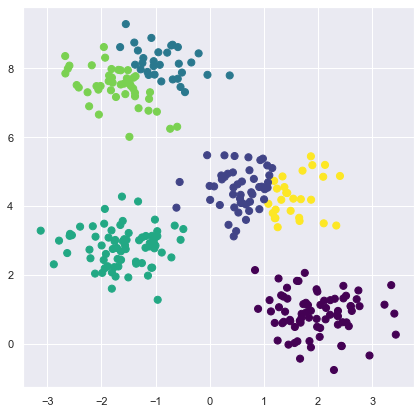

In [13]:
labels = KMeans(6, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');

# Issue - k-means is limited to linear cluster boundaries

In [ ]:
"""
The fundamental model assumptions of k-means (points will be closer to their own cluster center than to others) 
means that the algorithm will often be ineffective if the clusters have complicated geometries. 

In particular, the boundaries between k-means clusters will always be linear, which means that it will fail for
more complicated boundaries. Consider the following data, along with the cluster labels found by the typical 
k-means approach.
"""

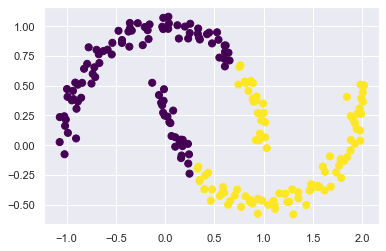

In [15]:
X, y = make_moons(200, noise=.05, random_state=0)
labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');

In [ ]:
"""
This situation is reminiscent of SVM where a kernel transformation is used to project the data into a higher 
dimension where a linear separation is possible. We might imagine using the same trick to allow k-means to 
discover nonlinear boundaries.
"""

/Users/gmura/anaconda3/envs/trainingAI/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


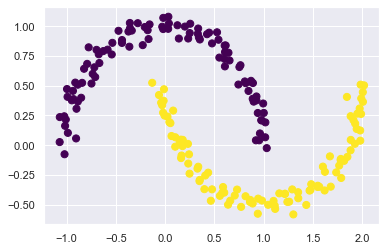

In [18]:
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')

# Issue - k-means can be slow for large numbers of samples

In [ ]:
"""
Because each iteration of k-means must access every point in the dataset, the algorithm can be relatively slow 
as the number of samples grows. You might wonder if this requirement to use all data at each iteration can be 
relaxed; for example, you might just use a subset of the data to update the cluster centers at each step. This 
is the idea behind batch-based k-means algorithms, one form of which is implemented in 
sklearn.cluster.MiniBatchKMeans. The interface for this is the same as for standard KMeans; we will see an 
example of its use as we continue our discussion.
"""